<a href="https://colab.research.google.com/github/khushi-411/emotion-recognition/blob/main/data-visualization/density_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font face = "Times New Roman"> <b> DENSITY PLOTS </b> </font>

### <font face = "Times New Roman"> <b> Importing Libraries </b> </font>

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import drive

In [ ]:
"""
   Connect google drive to google colab.
"""

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <font face = "Times New Roman"> <b> Loading Dataset </b> </font>

In [ ]:
"""
   Function to load dataset.
"""

def load_data(file_path):
  try:
    df = pd.read_csv(file_path)
    return df
  
  except FileNotFoundError as error:
    print("File Not Found Error during loading data")
    raise error

  except Exception as error:
      print("Exception Error: load_data")
      print(error)
      return ""

In [ ]:
"""
   Loading dataset.
"""

data = "/content/drive/MyDrive/er-output.csv"


In [ ]:
df = load_data(data)

In [ ]:
df.drop(labels='Unnamed: 0', axis='columns', inplace=True, errors='raise')

In [ ]:
emotion_label = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [ ]:
"""
   Converting dataframe into numpy array.
"""

df_all = df.iloc[:,:2304]
df_all_numpy = df_all.to_numpy()

df_label = df["emotion"]
df_label_numpy = df_label.to_numpy()

In [ ]:
def select_emotion(df_all, df_label, df, _emotion):

  """Select emotion type among all.

    Parameters
    ----------
    df_all : data-frame of shape (35887, 2304) 
             columns consists of pixel values (emotion column removed)

    df_label : consists of emotion label

    df : complete data-frame of shape (35887, 2305)

    _emotion : emotion type selected by the user

    Returns
    -------
    _data : all the data consisting the given emotion

    _data_numpy : numpy array to _data

    _data_label : consist all the data labels, of provided emotion 

    _data_label_numpy : numpy array of data label
    """


  try:

    _emotion = int(_emotion)

    _data = df_all[df["emotion"] == _emotion]
    _data_numpy = _data.to_numpy()

    _data_label = df_label[df["emotion"] == _emotion]
    _data_label_numpy = _data_label.to_numpy()

    return _data, _data_numpy, _data_label, _data_label_numpy

  except ValueError as error:
    raise error

  except TypeError as error:
    raise error

  except IndentationError as error:
    raise error

In [ ]:
def intensity_plot(_data, pixel):
  
  try:

    start = time.time()

    ax = sns.displot(_data,
                  x="pixel_"+pixel,
                  kde=True
                  )

    ax.set(xlabel='pixel_'+pixel, ylabel='Frequency')
    print("Time taken to plot: ", time.time() - start)

  except AttributeError as error:
    print("Attribute Error Occured.")
    print("The error is ", error)
    
  except ValueError as error:
    print("Value Error Occured.")
    print("The error is ", error)

Enter type of emotion whose distribution has to be ploted: 3
Enter pixel value you want to plot: pixel_100
Time taken to plot:  0.23398733139038086


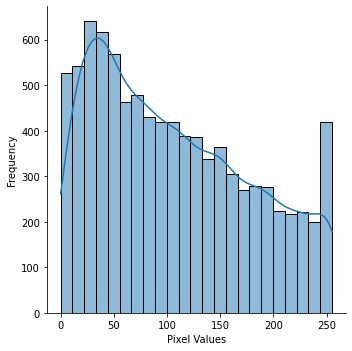

In [ ]:
_emotion_type = input("Enter type of emotion whose distribution has to be ploted: ")
pixel = input("Enter pixel value you want to plot: pixel_")
_data, _data_numpy, _data_label, _data_label_numpy = select_emotion(df_all, df_label, df, _emotion_type)

intensity_plot(_data, pixel)

In [ ]:
def intensity_plot_hue(_data, pixel):
  
  try:

    start = time.time()

    ax = sns.displot(_data,
                  x="pixel_"+pixel,
                  hue=df['emotion'],
                  kind='kde'
                  #multiple='stack'
                  )

    ax.set(xlabel='pixel_'+pixel, ylabel='Frequency')
    print("Time taken to plot: ", time.time() - start)

  except AttributeError as error:
    print("Attribute Error Occured.")
    print("The error is ", error)
    
  except ValueError as error:
    print("Value Error Occured.")
    print("The error is ", error)

Enter type of emotion whose distribution has to be ploted: 1
Enter pixel value you want to plot: pixel_23
Time taken to plot:  0.4990379810333252


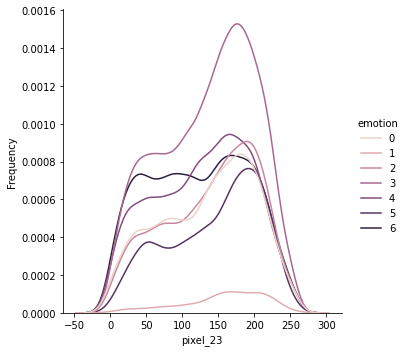

In [ ]:
_emotion_type = input("Enter type of emotion whose distribution has to be ploted: ")
pixel = input("Enter pixel value you want to plot: pixel_")
#_data, _data_numpy, _data_label, _data_label_numpy = select_emotion(df_all, df_label, df, _emotion_type)

intensity_plot_hue(df, pixel)

In [ ]:
def scatter_plot(_data, pixel_x, pixel_y):
  
  try:

    start = time.time()

    fig = px.scatter(_data, x="pixel_"+pixel_x, y="pixel_"+pixel_y)
    fig.show()
    print("Time taken to plot: ", time.time() - start)

  except AttributeError as error:
    print("Attribute Error Occured.")
    print("The error is ", error)
    
  except ValueError as error:
    print("Value Error Occured.")
    print("The error is ", error)

In [ ]:
_emotion_type = input("Enter the emotion type whose mean of pixel values you want to find: ")
print("Data Type of _emotion_type: ", type(_emotion_type))

pixel_x = input("Enter pixel value you want to plot (x-axis): pixel_")

pixel_x = input("Enter pixel value you want to plot (y-axis): pixel_")

_data, _data_numpy, _data_label, _data_label_numpy = select_emotion(df_all, df_label, df, _emotion_type)

scatter_plot(_data, pixel_x, pixel_y)

In [ ]:
fig = px.scatter(_data, x="pixel_1", y="pixel_10", color="pixel_25",
                 size='pixel_1', hover_data=['pixel_10'])
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=_data['pixel_1'],
                                y=_data['pixel_20'],
                                mode='markers',
                                marker_color=_data['pixel_30'],
                                text=_data['pixel_1'])) # hover text goes here

fig.update_layout(title='Density Plot')
fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(
    y = _data["pixel_29"],
    mode='markers',
    marker=dict(
        size=16,
        color=np.random.randn(256), #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
    )
))

fig.show()

In [ ]:
fig = go.Figure(data=go.Scattergl(
    x = _data["pixel_10"],
    y = _data["pixel_30"],
    mode='markers',
    marker=dict(
        color=np.random.randn(255),
        colorscale='Viridis',
        line_width=1
    )
))

fig.show()